In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

sns.set_theme(style = "darkgrid")
plt.rcParams["text.usetex"] = True
plt.rcParams['figure.figsize'] = 12,8

In [10]:
def loadAndPrepData(path: str) -> pd.DataFrame:
    # Read Data
    data = pd.read_json(path, lines = True)
    
    print("Loaded -> Now extracting OPT-Values")

    # Extract OPT-Values for every Line
    val_na = []
    val_ll = []
    val_is = []
    val_it = []
    val_op = []

    for _, row in data.iterrows():
        if row["algo"] == "OPT":
            val_na.append(row["na"])
            val_ll.append(row["l"])
            val_is.append(row["ins_id"])
            val_it.append(row["iter_id"])
            val_op.append(row["val"])

    opt_data = pd.DataFrame.from_dict({
        "na": val_na,
        "l": val_ll,
        "ins_id": val_is,
        "iter_id": val_it,
        "opt": val_op
    })

    data = data.merge(opt_data, on = ["na", "l", "ins_id", "iter_id"])

    # Group Algorithms by k and l
    data["kk"] = (data["k"] * 4) / data["na"]
    data["ll"] = (data["l"] * 4) / data["k"]

    data[["kk", "ll"]] = data[["kk", "ll"]].astype(int)

    # Evaluate Algorithms
    data["approx"] = data["val"] / data["opt"]

    return data

def goalToFunction(goal: str) -> str:
    if "MAX" in goal:
        return r'$f_{max}$'
    elif "SUM" in goal:
        return r'$f_{sum}$'
    else:
        return r'$f_{cov}$'

def plotData(data: pd.DataFrame, is_uniform: bool):
    # Plot Data
    fig, ax = plt.subplots(3, 4, sharex = True, sharey = True)

    for k in range(3):
        for l in range(4):
            plot = sns.lineplot(ax = ax[k, l], data = data[(data.kk == (k + 1)) & (data.ll == (l + 1)) & (data.algo != "OPT") & (data.algo != "EXT")], x = "na", y = "approx", hue = "algo")
            if k != 2 or l != 3:
                plot.get_legend().remove()
            else:
                plt.setp(plot.get_legend().get_texts(), fontsize = 17)
                plot.get_legend().set_title("Algorithm")

    ax[0][0].set_title(r'$\ell = \frac{1}{4}k$', fontsize = 17)
    ax[0][1].set_title(r'$\ell = \frac{2}{4}k$', fontsize = 17)
    ax[0][2].set_title(r'$\ell = \frac{3}{4}k$', fontsize = 17)
    ax[0][3].set_title(r'$\ell = \frac{4}{4}k$', fontsize = 17)

    ax[2][0].set_xlabel("")
    ax[2][1].set_xlabel("")
    ax[2][2].set_xlabel("")
    ax[2][3].set_xlabel("")

    ax[0][0].set_ylabel(r'$k = \frac{1}{4}n_A$', fontsize = 17)
    ax[1][0].set_ylabel(r'$k = \frac{2}{4}n_A$', fontsize = 17)
    ax[2][0].set_ylabel(r'$k = \frac{3}{4}n_A$', fontsize = 17)

    if is_uniform:
        fig.suptitle(goalToFunction(data["goal"].iloc[0]) + r' : $n_A = n_B = |\mathcal{V}| = 16 \cdot z$', fontsize = 23, y = 0.97)
    else:
        fig.suptitle(goalToFunction(data["goal"].iloc[0]) + r' : $n_A = 16 \cdot z,\, n_B = 400 \cdot z,\, |\mathcal{V}| = 10$', fontsize = 23, y = 0.97)

    fig.text(0.5, 0.04, r'$n_{\mathcal{A}}$', ha = "center", fontsize = 20)
    fig.text(0.04, 0.5, r'$val_{ALG} / val_{OPT}$', va = "center", rotation = "vertical", fontsize = 20)

    plt.show()

# Uniform Max

In [4]:
uniform_max_data = loadAndPrepData("../data/MAX_UNIFORM.json")

Loaded -> Now extracting OPT-Values


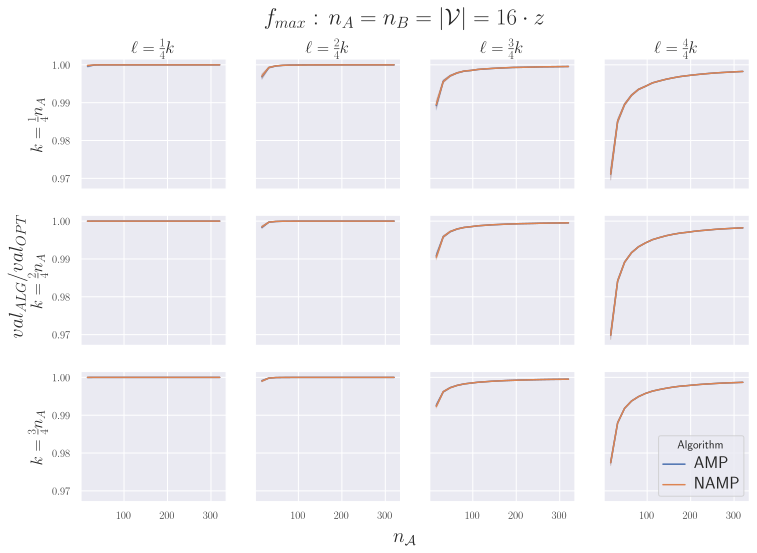

In [11]:
plotData(uniform_max_data, True)

# Uniform Sum

In [12]:
uniform_sum_data = loadAndPrepData("../data/SUM_UNIFORM.json")

Loaded -> Now extracting OPT-Values


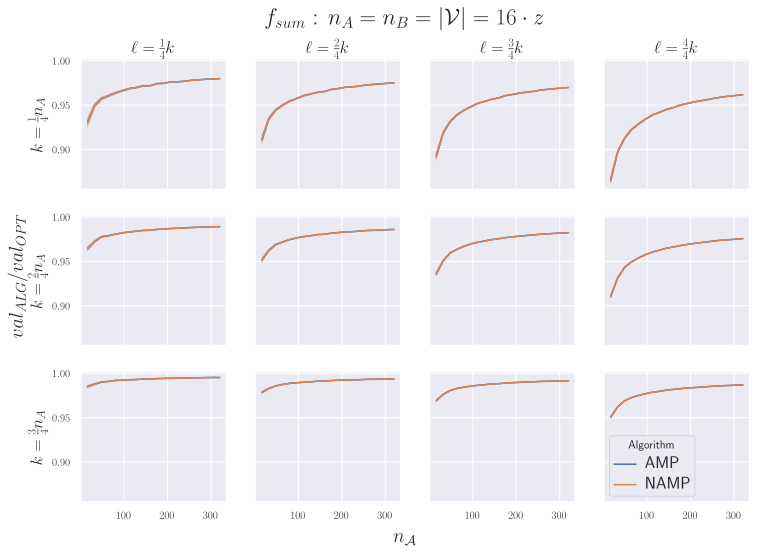

In [13]:
plotData(uniform_sum_data, True)

# Uniform Cov

In [14]:
uniform_cov_data = loadAndPrepData("../data/COV_UNIFORM.json")

Loaded -> Now extracting OPT-Values


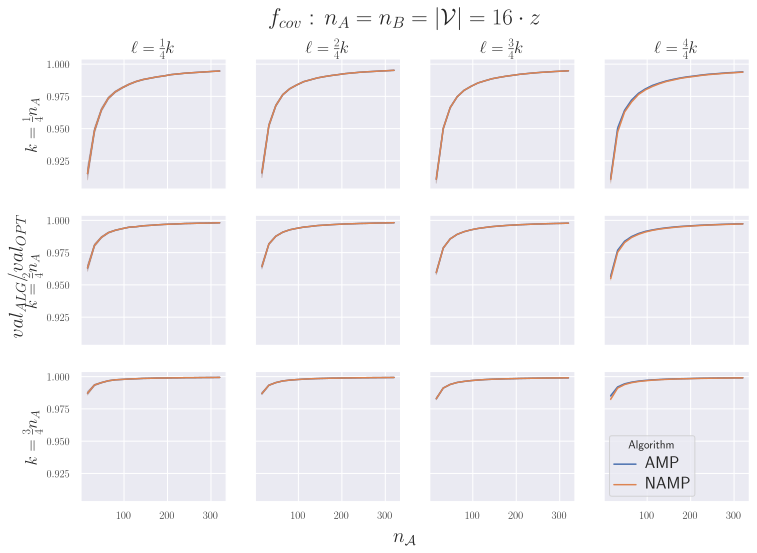

In [15]:
plotData(uniform_cov_data, True)

# Network Max

In [16]:
network_max_data = loadAndPrepData("../data/MAX_NETWORK.json")

Loaded -> Now extracting OPT-Values


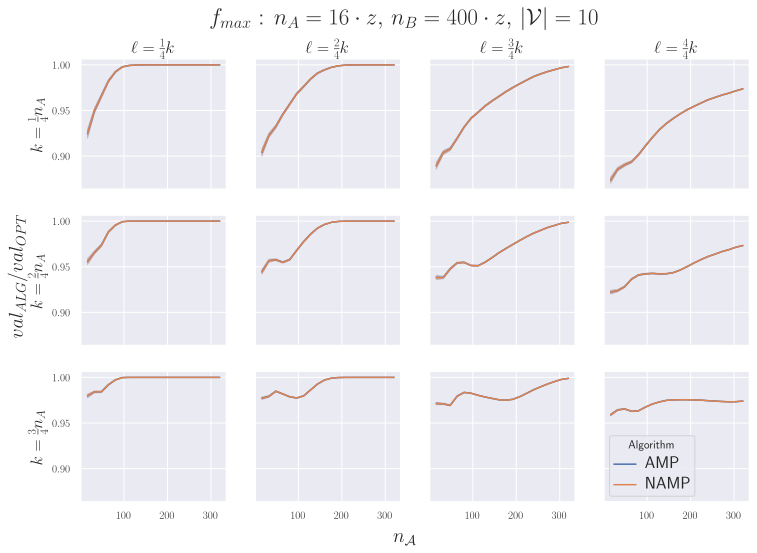

In [17]:
plotData(network_max_data, False)

# Network Sum

In [18]:
network_sum_data = loadAndPrepData("../data/SUM_NETWORK.json")

Loaded -> Now extracting OPT-Values


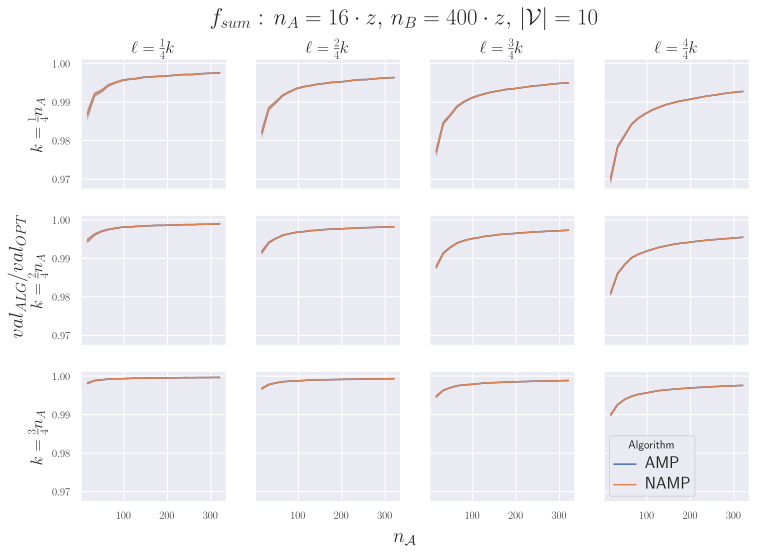

In [19]:
plotData(network_sum_data, False)